### Step 1: Import Required Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

### Step 2: Load the Dataset

In [24]:
data = pd.read_excel('MultiClass-dataset.xlsx')

In [25]:
data.head()

,S.No,SL,RT,FL,SL.1,CTL,LW,Type
0,1,17.0,7.0,4.2,12.7,4.3,0.3,KK
1,2,15.3,27.0,2.2,11.0,4.3,0.3,KK
2,3,18.0,29.5,3.7,12.7,5.2,0.3,KK
3,4,13.2,9.5,2.8,9.2,4.2,0.2,KK
4,5,15.5,27.2,2.3,11.0,4.1,0.2,KK


### Explore the Dataset

In [26]:
print("First few rows of the dataset:")
print(data.head())
print("\nDataset Information:")
print(data.info())

First few rows of the dataset:
   S.No    SL    RT   FL  SL.1  CTL   LW Type
0     1  17.0   7.0  4.2  12.7  4.3  0.3   KK
1     2  15.3  27.0  2.2  11.0  4.3  0.3   KK
2     3  18.0  29.5  3.7  12.7  5.2  0.3   KK
3     4  13.2   9.5  2.8   9.2  4.2  0.2   KK
4     5  15.5  27.2  2.3  11.0  4.1  0.2   KK

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S.No    135 non-null    int64  
 1   SL      135 non-null    float64
 2   RT      135 non-null    float64
 3   FL      127 non-null    float64
 4   SL.1    130 non-null    float64
 5   CTL     130 non-null    float64
 6   LW      133 non-null    float64
 7   Type    135 non-null    object 
dtypes: float64(6), int64(1), object(1)
memory usage: 8.6+ KB
None


### Step 3: Handle Missing Values (NA)

In [27]:
# Fill missing values with the mean (for numeric features)
data.fillna(data.mean(numeric_only=True), inplace=True)

### Step 4: Separate Features and Target Variable

In [28]:
X = data.iloc[:, :-1]  # All columns except the last one as features
y = data.iloc[:, -1]   # Last column as target

### Step 5: Encode the Target Variable

In [29]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)  # Convert to one-hot encoding

### Step 6: Split the Dataset

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42)

### Step 7: Standardize the Feature Data

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Baseline Model for Comparison (Logistic Regression)

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
# Train the logistic regression model
baseline_model = LogisticRegression(max_iter=500)
baseline_model.fit(X_train, np.argmax(y_train, axis=1))

LogisticRegression(max_iter=500)

### Evaluate the baseline model

In [48]:
baseline_pred = baseline_model.predict(X_test)
baseline_accuracy = accuracy_score(np.argmax(y_test, axis=1), baseline_pred)
print(f"Baseline Model Accuracy: {baseline_accuracy:.4f}")

Baseline Model Accuracy: 0.6296


### Step 8: Define the Neural Network Model

In [32]:
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')
])

c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 9: Compile the Model

In [33]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


### Step 10: Implement Early Stopping to Prevent Overfitting

In [34]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


### Step 11: Train the Model

In [35]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=100, batch_size=16, verbose=1, callbacks=[early_stopping])

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.0822 - loss: 2.8583 - val_accuracy: 0.0370 - val_loss: 2.5064
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1018 - loss: 2.8032 - val_accuracy: 0.1852 - val_loss: 2.4745
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1867 - loss: 2.4838 - val_accuracy: 0.2222 - val_loss: 2.4458
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1680 - loss: 2.3966 - val_accuracy: 0.2963 - val_loss: 2.4198
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2760 - loss: 2.1065 - val_accuracy: 0.2963 - val_loss: 2.3934
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3001 - loss: 2.1105 - val_accuracy: 0.2593 - val_loss: 2.3650
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2754 - loss: 2.0936 - val_accuracy: 0.2963 - val_loss: 2.3341
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3922 - loss: 1.8746 - val_accuracy: 0.3704 - val_loss: 2.3005

### Step 12: Evaluate the Model

In [36]:
_, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
_, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.8611
Testing Accuracy: 0.7407


In [50]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 12)             │           396 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,294 (141.78 KB)

 Trainable params: 12,012 (46.92 KB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 24,026 (93.86 KB)

### Step 13: Generate Predictions

In [37]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


### Step 14: Print Classification Report

In [38]:
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_))


Classification Report:
              precision    recall  f1-score   support

          CK       0.50      1.00      0.67         1
         CNR       0.50      0.50      0.50         2
          KK       0.25      1.00      0.40         1
          KL       1.00      0.20      0.33         5
         KLR       0.50      0.50      0.50         2
         KSB       1.00      1.00      1.00         2
          MS       1.00      1.00      1.00         3
         MSM       1.00      1.00      1.00         2
          NG       1.00      1.00      1.00         3
          SK       1.00      1.00      1.00         2
          SM       0.00      0.00      0.00         1
          YK       0.75      1.00      0.86         3

    accuracy                           0.74        27
   macro avg       0.71      0.77      0.69        27
weighted avg       0.81      0.74      0.71        27



c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### Step 15: Confusion Matrix

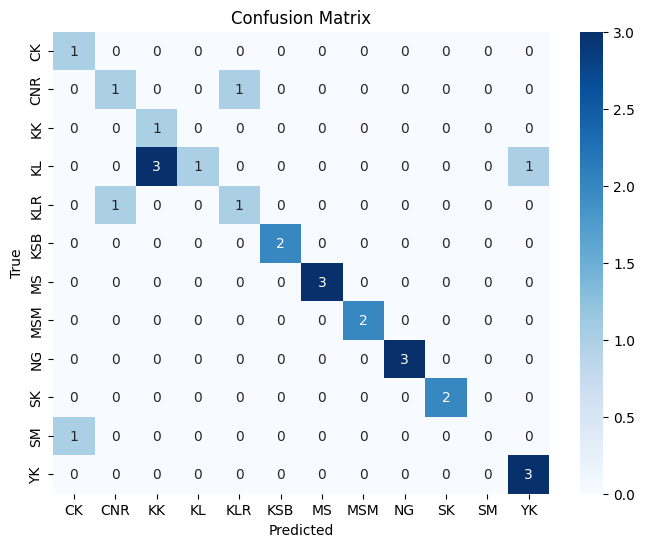

In [39]:
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

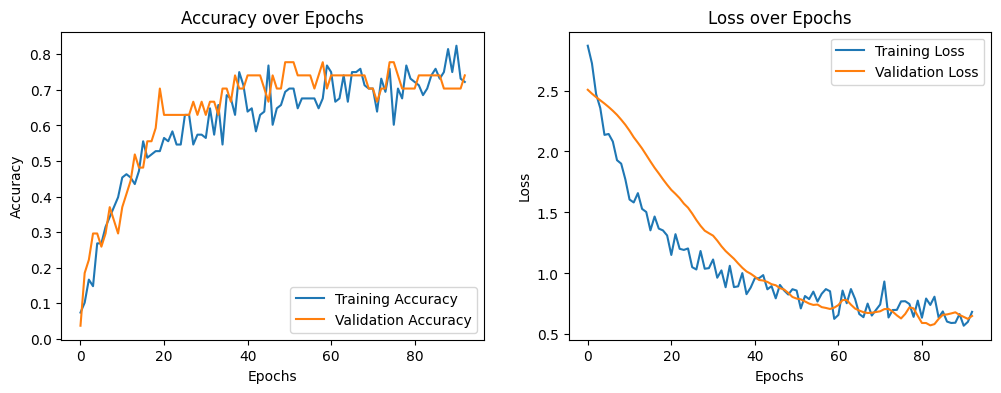

In [40]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

## Comparision with BaseLine Model (Logistic Regression)

In [49]:
print("\nComparison of Model Performance:")
print(f"Baseline Model Accuracy: {baseline_accuracy:.4f}")
print(f"Neural Network Model Accuracy: {test_accuracy:.4f}")


Comparison of Model Performance:
Baseline Model Accuracy: 0.6296
Neural Network Model Accuracy: 0.7407
